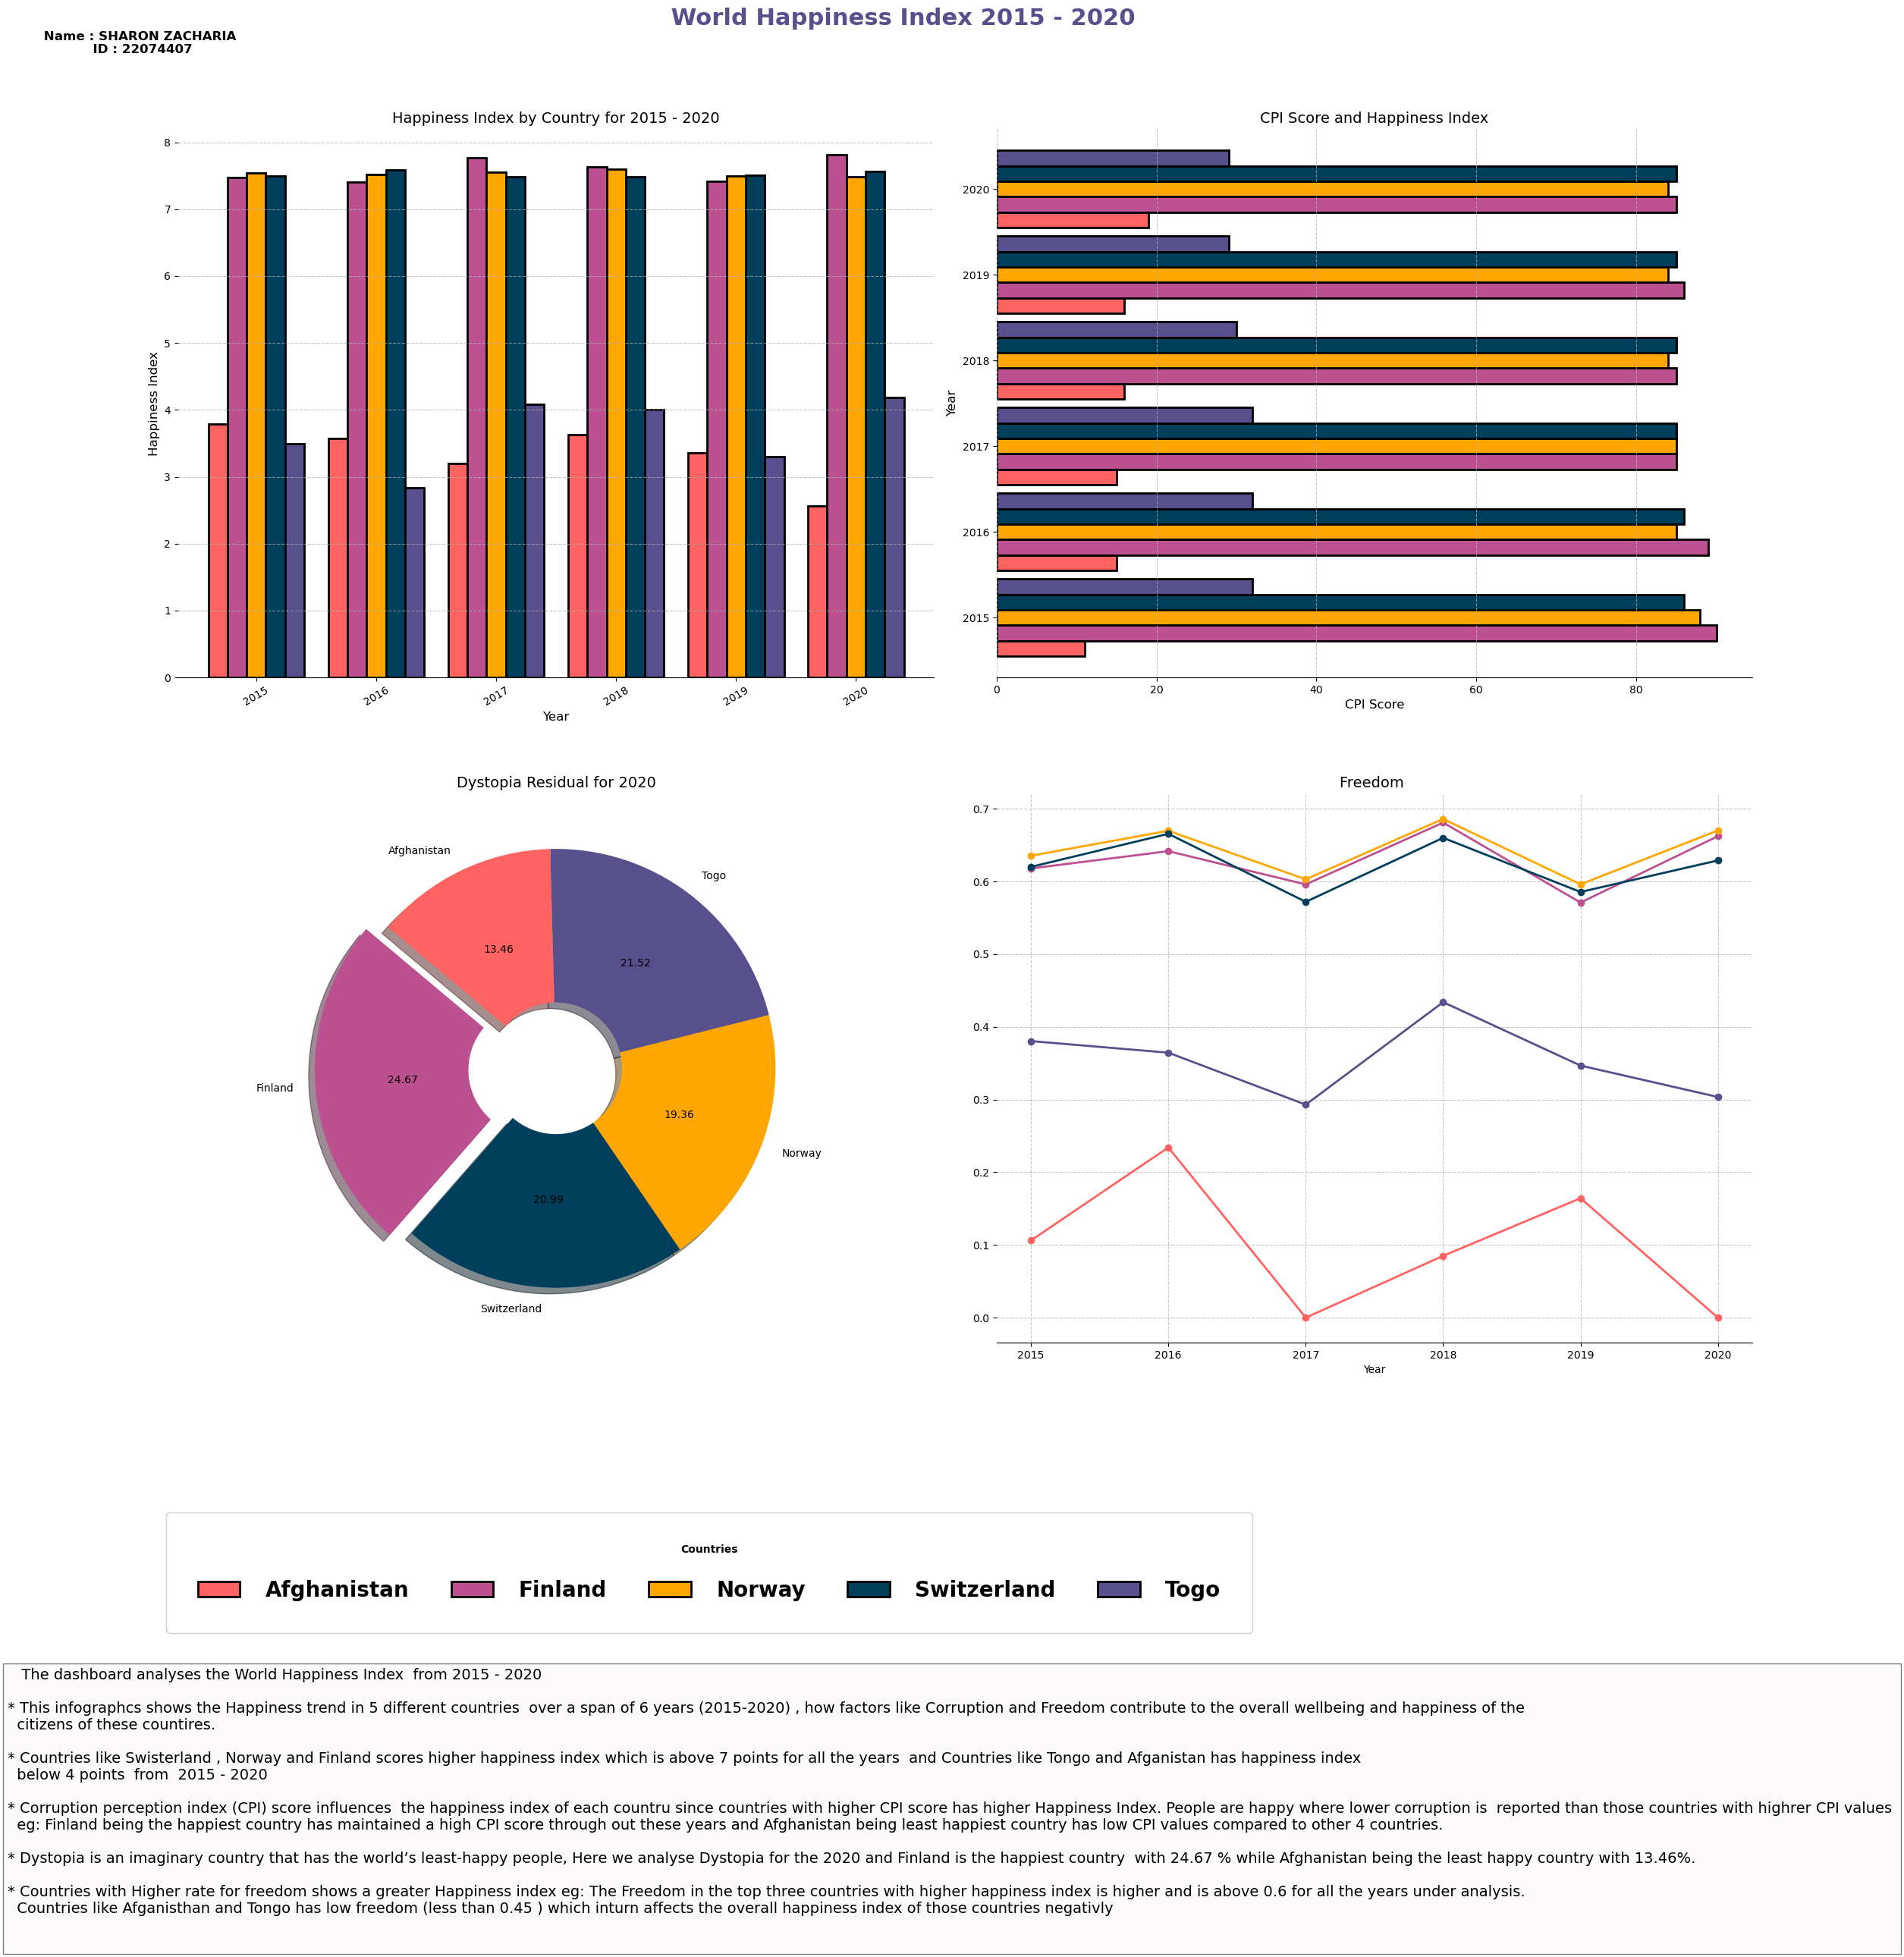

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to original dataset
dataset_Path = "WorldHappiness_Corruption_2015_2020.csv"

# Selected countries for analysis
COUNTRY_NAMES = [
    "Togo", "Afghanistan", "Finland", "Norway", "Switzerland",
]

ColorMap = {
    "Togo": "#58508d",
    "Afghanistan": "#ff6361",
    "Finland": "#bc5090",
    "Norway": "#ffa600",
    "Switzerland": "#003f5c"
}

YEARS = [2018, 2019, 2020]
year = 2020
width = 0.10

# Function to read dataset
def readDataSet(path):
    df = pd.read_csv(path)
    cleaned_df = df.dropna()
    return cleaned_df

cleaned_df = readDataSet(dataset_Path)
df_filtered = cleaned_df[cleaned_df['Country'].isin(COUNTRY_NAMES)]
filetred_df_Hindex = df_filtered[["Country", "happiness_score", "Year"]]
pivot_df_Hindex = filetred_df_Hindex.pivot(
    index='Year', columns='Country', values='happiness_score')
df_filtered_CPI = df_filtered[["Country", "cpi_score", "Year"]]
pivot_df_CPI = df_filtered_CPI.pivot(
    index='Year', columns='Country', values='cpi_score')
df_filtered_dystopia = df_filtered[df_filtered['Year'] == 2020][[
    "Country", "dystopia_residual"]]
df_filtered_Freedom = df_filtered[["Country", "freedom", "Year"]]
pivot_df_Freedom = df_filtered_Freedom.pivot(
    index='Year', columns='Country', values='freedom')


# Function to get color for country
def get_country_color(country):
    return ColorMap.get(country, '#000000')  # Default to black if not found

# Creating a figure and axes using plt.subplots()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))
# fig.set_facecolor('#fceee9')
fig.suptitle(" World Happiness Index 2015 - 2020", fontsize=22,fontweight='bold', color='#58508d')
name_student_id = " Name : SHARON ZACHARIA \n  ID : 22074407 "
fig.text(0.1, 0.95, name_student_id, ha='center', fontsize=12,fontweight='bold')



for ax in axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    


# Second subplot: Happiness Index Bar Graph
pivot_df_Hindex.plot(kind='bar', width=0.8, ax=axes[0, 0], color=[
                     get_country_color(country) for country in pivot_df_Hindex.columns], edgecolor='black', linewidth=2)


axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Happiness Index', fontsize=12)
axes[0, 0].set_title('Happiness Index by Country for 2015 - 2020', fontsize=14)


# Add the text below the title


# Remove individual legend from this specific subplot
axes[0, 0].legend().remove()

# Customize grid lines for the plot
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Customize ticks and tick labels
axes[0, 0].tick_params(axis='x', rotation=30)  # Remove individual legend




# Third subplot: CPI Score Horizontal Bar Graph
pivot_df_CPI.plot(kind="barh", width=0.9,ax=axes[0, 1], color=[
                  get_country_color(country) for country in pivot_df_CPI.columns], edgecolor='black',linewidth=2)

axes[0, 1].set_xlabel('CPI Score', fontsize=12)
axes[0, 1].set_ylabel('Year', fontsize=12)
axes[0, 1].set_title('CPI Score and Happiness Index', fontsize=14)

# Remove individual legend from this specific subplot
axes[0, 1].legend().remove()

# Customize grid lines for the plot
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.7)  # Show grid lines along the x-axis

# Customize ticks and tick labels
axes[0, 1].tick_params(axis='y')  # Customize ticks on the y-axis
 # Remove individual legend

# Fourth subplot: Dystopia Residual Pie Chart
explode = [0.1 if i == 0 else 0 for i in range(len(df_filtered_dystopia["Country"]))]

axes[1, 0].pie(
    df_filtered_dystopia["dystopia_residual"],
    labels=df_filtered_dystopia["Country"],
    startangle=140,
    colors=[get_country_color(country)
            for country in df_filtered_dystopia["Country"]],
    explode=explode,
    autopct='%.2f',
    shadow=True,
    wedgeprops={'width': 0.7},  # Set the width to create a donut chart
)
axes[1, 0].set_title('Dystopia Residual for 2020', fontsize=14)
axes[1, 0].legend().remove()  # Remove individual legend

# Fifth subplot: Freedom Line Plot
pivot_df_Freedom.plot(kind="line", ax=axes[1, 1], marker='o', color=[
                      get_country_color(country) for country in pivot_df_Freedom.columns], linewidth=2)
                      

axes[1, 1].set_title('Freedom ', fontsize=14)

# Remove individual legend from this specific subplot
axes[1, 1].legend().remove()

# Customize grid lines for the plot
axes[1, 1].grid(axis='both', linestyle='--', alpha=0.7)  # Show grid lines along both axes

# Customize ticks and tick labels
axes[1, 1].tick_params(axis='both')  # Remove individual legend

handles, labels = axes[0, 0].get_legend_handles_labels()

# Create a legend using the handles and labels obtained
legend = fig.legend(handles, labels, loc='upper center', title='Countries', bbox_to_anchor=(0.4, -0.005),
                    ncol=len(COUNTRY_NAMES), facecolor='white', framealpha=1, fontsize=20, 
                    borderpad=1.5, handletextpad=1.2, labelspacing=1.2)

# Customize legend properties
for text in legend.get_texts():
    text.set_fontweight('bold')
legend.get_title().set_fontweight('bold')

# Adjust layout and save the figure
plt.tight_layout(pad=4.0, h_pad=6.0, w_pad=2.0)
# fig.subplots_adjust(wspace=0.8, hspace=0.6)

# Save the plot
plt.savefig('combined_plots.png', dpi=300,
            bbox_extra_artists=(legend,), bbox_inches='tight')


# Show the plots


description_text = """   

* The dashboard analyses the World Happiness Index  from 2015 - 2020

* This infographcs shows the Happiness trend in 5 different countries  over a span of 6 years (2015-2020) , how factors like Corruption and Freedom contribute to the overall wellbeing and happiness of the 
  citizens of these countires.

* Countries like Swisterland , Norway and Finland scores higher happiness index which is above 7 points for all the years  and Countries like Tongo and Afganistan has happiness index
  below 4 points  from  2015 - 2020
    
* Corruption perception index (CPI) score influences  the happiness index of each countru since countries with higher CPI score has higher Happiness Index. People are happy where lower corruption is  reported than those countries with highrer CPI values 
  eg: Finland being the happiest country has maintained a high CPI score through out these years and Afghanistan being least happiest country has low CPI values compared to other 4 countries.

* Dystopia is an imaginary country that has the world’s least-happy people, Here we analyse Dystopia for the 2020 and Finland is the happiest country  with 24.67 % while Afghanistan being the least happy country with 13.46%.

* Countries with Higher rate for freedom shows a greater Happiness index eg: The Freedom in the top three countries with higher happiness index is higher and is above 0.6 for all the years under analysis. 
  Countries like Afganisthan and Tongo has low freedom (less than 0.45 ) which inturn affects the overall happiness index of those countries negativly

"""

fig.text(0.03, -0.3, description_text, ha='left', va='bottom', fontsize=14, bbox=dict(facecolor='#faf6f6', alpha=0.5))
plt.subplots_adjust(left=0.12, right=0.95, top=0.9, bottom=0.1)

plt.show()
